In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ^1.10.3
[juliapkg] Using Julia 1.11.6 at /home/ajt6830/.julia/juliaup/julia-1.11.6+0.x64.linux.gnu/bin/julia
[juliapkg] Using Julia project at /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env
[juliapkg] Writing Project.toml:
             [deps]
             SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
             Serialization = "9e88b42a-f829-5b0c-bbe9-9e923198166b"
             PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
             OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
             [compat]
             SymbolicRegression = "~1.11

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.26
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.3
  [8d63f2c5] + DispatchDoctor v0.4.26
  [ffbed154] + DocStringExtensio

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
import sxs

In [3]:
import torch
import torchvision

In [4]:
from nrcatalogtools import RITCatalog
rcatalog = RITCatalog.load()
#rcatalog.simulations_dataframe is a pandas dataframe, and I can access the columns of the pandas data frame

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/nrcatalogtools/lvc.py:2: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as

No version information file '.version' found


In [6]:
display(rcatalog.simulations_dataframe)
print(rcatalog.simulations_dataframe.index)

,Unnamed: 0,catalog-tag,resolution-tag,id-tag,run-name,data-type,system-type,comments,authors-emails,simulation-bibtex-keys,...,peak-omega-22,peak-ampl-22,Msun,metadata_link,metadata_location,psi4_data_link,psi4_data_location,waveform_data_link,waveform_data_location,simulation_name
RIT:BBH:0001-n100-id3,NaN,RIT:BBH:0001,n100,id3,U0_D9.53_q1.00_a0.0_n100,NR,Nonspinning,none,"James Healy <jchsma@rit.edu>, Carlos Lousto <c...","Healy:2014yta, Healy:2016lce",...,0.000000,0.000000,0.0,https://ccrgpages.rit.edu/~RITCatalog//Metadat...,/home/ajt6830/.cache/RIT/metadata/RIT:BBH:0001...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapPsi4_RIT-B...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapStrain_RIT...,RIT:BBH:0001-n100-id3
RIT:BBH:0002-n100-id0,NaN,RIT:BBH:0002,n100,id0,U0_D8.51_q6.00_a0.83333_n100_am,NR,Aligned,none,"James Healy <jchsma@rit.edu>, Carlos Lousto <c...","Healy:2014yta, Healy:2016lce, Healy:2018swt",...,0.000000,0.000000,0.0,https://ccrgpages.rit.edu/~RITCatalog//Metadat...,/home/ajt6830/.cache/RIT/metadata/RIT:BBH:0002...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapPsi4_RIT-B...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapStrain_RIT...,RIT:BBH:0002-n100-id0
RIT:BBH:0003-n100-id0,NaN,RIT:BBH:0003,n100,id0,U0_D8.65_q5.00_a0.8_n100,NR,Aligned,none,"James Healy <jchsma@rit.edu>, Carlos Lousto <c...","Healy:2014yta, Healy:2016lce, Healy:2018swt",...,0.000000,0.000000,0.0,https://ccrgpages.rit.edu/~RITCatalog//Metadat...,/home/ajt6830/.cache/RIT/metadata/RIT:BBH:0003...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapPsi4_RIT-B...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapStrain_RIT...,RIT:BBH:0003-n100-id0
RIT:BBH:0004-n100-id0,NaN,RIT:BBH:0004,n100,id0,U0_D8.8_q4.00_a0.75_n100_am,NR,Aligned,none,"James Healy <jchsma@rit.edu>, Carlos Lousto <c...","Healy:2014yta, Healy:2016lce, Healy:2018swt",...,0.000000,0.000000,0.0,https://ccrgpages.rit.edu/~RITCatalog//Metadat...,/home/ajt6830/.cache/RIT/metadata/RIT:BBH:0004...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapPsi4_RIT-B...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapStrain_RIT...,RIT:BBH:0004-n100-id0
RIT:BBH:0005-n100-id0,NaN,RIT:BBH:0005,n100,id0,U0_D9.07_q3.00_a0.66667_n100,NR,Aligned,none,"James Healy <jchsma@rit.edu>, Carlos Lousto <c...","Healy:2014yta, Healy:2016lce, Healy:2018swt",...,0.000000,0.000000,0.0,https://ccrgpages.rit.edu/~RITCatalog//Metadat...,/home/ajt6830/.cache/RIT/metadata/RIT:BBH:0005...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapPsi4_RIT-B...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapStrain_RIT...,RIT:BBH:0005-n100-id0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RIT:BBH:1919-n100-id1,NaN,RIT:BBH:1919,n100,id1,D11.82_q0.2500_a0.8_th30_ph285_opt_n100,NR,Precessing,none,"James Healy <jchsma@rit.edu>, Carlos Lousto <c...",NaN,...,0.268534,0.205878,0.0,https://ccrgpages.rit.edu/~RITCatalog//Metadat...,/home/ajt6830/.cache/RIT/metadata/RIT:BBH:1919...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapPsi4_RIT-B...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapStrain_RIT...,RIT:BBH:1919-n100-id1
RIT:BBH:1920-n100-id1,NaN,RIT:BBH:1920,n100,id1,D11.82_q0.2500_a0.8_th30_ph135_opt_n100,NR,Precessing,none,"James Healy <jchsma@rit.edu>, Carlos Lousto <c...",NaN,...,0.439077,0.257428,0.0,https://ccrgpages.rit.edu/~RITCatalog//Metadat...,/home/ajt6830/.cache/RIT/metadata/RIT:BBH:1920...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,/home/ajt6830/.cache/RIT/data/ExtrapPsi4_RIT-B...,https://ccrgpages.rit.edu/~RITCatalog//Data//E...,

Index(['RIT:BBH:0001-n100-id3', 'RIT:BBH:0002-n100-id0',
       'RIT:BBH:0003-n100-id0', 'RIT:BBH:0004-n100-id0',
       'RIT:BBH:0005-n100-id0', 'RIT:BBH:0006-n100-id3',
       'RIT:BBH:0007-n100-id0', 'RIT:BBH:0008-n100-id0',
       'RIT:BBH:0009-n100-id0', 'RIT:BBH:0010-n100-id0',
       ...
       'RIT:BBH:1914-n144-id1', 'RIT:BBH:1915-n144-id1',
       'RIT:BBH:1916-n100-id1', 'RIT:BBH:1917-n100-id1',
       'RIT:BBH:1918-n100-id1', 'RIT:BBH:1919-n100-id1',
       'RIT:BBH:1920-n100-id1', 'RIT:BBH:1921-n100-id1',
       'RIT:BBH:1922-n100-id1', 'RIT:BBH:1923-n100-id1'],
      dtype='object', length=1879)


In [8]:
def chi_eff(m_1, m_2, s_1, s_2, L):
    return (m_1*np.dot(s_1, L) + m_2*np.dot(s_2, L))/(m_1 + m_2)

def chi_perp(s, L):
    x = np.cross(s, L)
    return np.sqrt(np.dot(x, x))

In [111]:

#Here is where I get all of the simulation parameters at relaxation time from the metadata to predict merger time. 

non_ecc_ind_start = 1
non_ecc_ind_end = 1044
num_sims = non_ecc_ind_end - non_ecc_ind_start + 1

m1_rit = rcatalog.simulations_dataframe['relaxed-mass1'][non_ecc_ind_start: non_ecc_ind_end+1]
m2_rit = rcatalog.simulations_dataframe['relaxed-mass2'][non_ecc_ind_start: non_ecc_ind_end+1]
#Here, I have used the greater mass ratio convention that SXS uses rather than the RIT convention
q_rit = np.array(m2_rit/m1_rit)

chi1x_rit = rcatalog.simulations_dataframe['relaxed-chi1x'][non_ecc_ind_start: non_ecc_ind_end+1]
chi2x_rit = rcatalog.simulations_dataframe['relaxed-chi2x'][non_ecc_ind_start: non_ecc_ind_end+1]
chi1y_rit = rcatalog.simulations_dataframe['relaxed-chi1y'][non_ecc_ind_start: non_ecc_ind_end+1]
chi2y_rit = rcatalog.simulations_dataframe['relaxed-chi2y'][non_ecc_ind_start: non_ecc_ind_end+1]
chi1z_rit = rcatalog.simulations_dataframe['relaxed-chi1z'][non_ecc_ind_start: non_ecc_ind_end+1]
chi2z_rit = rcatalog.simulations_dataframe['relaxed-chi2z'][non_ecc_ind_start: non_ecc_ind_end+1]

chi1 = np.column_stack((chi1x_rit, chi1y_rit, chi1z_rit))
chi2 = np.column_stack((chi2x_rit, chi2y_rit, chi2z_rit))

LNx = rcatalog.simulations_dataframe['relaxed-LNhatx'][non_ecc_ind_start: non_ecc_ind_end+1]
LNy = rcatalog.simulations_dataframe['relaxed-LNhaty'][non_ecc_ind_start: non_ecc_ind_end+1]
LNz = rcatalog.simulations_dataframe['relaxed-LNhatz'][non_ecc_ind_start: non_ecc_ind_end+1]

L_norm = np.column_stack((LNx, LNy, LNz))

#I initally converted these numpy arrays into pandas dataframes for consistency with how the data was stored by NRtoolscatalog, but I think it will
#make things easier to keep everything consistently as numpy arrays

chi_eff_rit = np.zeros(num_sims)
for i in range(num_sims):
    chi_eff_rit[i] = chi_eff(m1_rit.iloc[i], m2_rit.iloc[i], chi1[i], chi2[i], L_norm[i])
#chi_eff_rit = pd.DataFrame(chi_eff_rit, index = rcatalog.simulations_dataframe.index[non_ecc_ind_start: non_ecc_ind_end+1])

chi1_perp_rit = np.zeros(num_sims)
for i in range(num_sims):
    chi1_perp_rit[i] = chi_perp(chi1[i], L_norm[i])
#chi1_perp_rit = pd.DataFrame(chi1_perp_rit, index = rcatalog.simulations_dataframe.index[non_ecc_ind_start: non_ecc_ind_end+1])

chi2_perp_rit = np.zeros(num_sims)
for i in range(num_sims):
    chi2_perp_rit[i] = chi_perp(chi2[i], L_norm[i])
#chi2_perp_rit = pd.DataFrame(chi2_perp_rit, index = rcatalog.simulations_dataframe.index[non_ecc_ind_start: non_ecc_ind_end+1])

In [193]:
#This cell is slightly different because it pulls information from a csv file instead of from the NRtoolscatalog
#Once again, I initally wanted to convert the data into pandas dataframes, but I think that numpy arrays are just simpler

df = pd.read_csv(r"/mnt/c/Users/Alex/OneDrive/Documents/Ohio_State_University/Penn_State_REU/RIT_Jul17_25.csv", usecols = ['Mf 2,2start', 'Merger Time'], skiprows = 0, nrows = num_sims)

#All I am given is the waveform frequency that the simulations are initialized with. The 2,2 mode waveform frequency will be twice as much as the orbital
#frequency of the binary, and since I believe I am given a frequency in Hz rather than an angular frequency, I only need to invert the frequency and 
#multiply by 2 to get the orbital period
tau_rit = 2*np.array(df['Mf 2,2start'])**(-1)
#tau_rit = pd.DataFrame(tau_rit, index = rcatalog.simulations_dataframe.index[non_ecc_ind_start: non_ecc_ind_end+1])

CHT_rit = np.array(df['Merger Time']) - np.array(rcatalog.simulations_dataframe['relaxed-time'][non_ecc_ind_start: non_ecc_ind_end+1])
#CHT_rit= pd.DataFrame(CHT_rit, index = rcatalog.simulations_dataframe.index[non_ecc_ind_start: non_ecc_ind_end+1])

In [202]:
#Here I will load in the relevant parameters (tau, q, chi_eff, chi1_perp, chi2_perp) from the RIT simulation database
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

#This first block subtracts corrections due to varying mass ratio from quadrupolar, Newtonian model
init_param_q = np.column_stack((tau_rit, q_rit))
with open("best_model_0.446.pk", 'rb') as file:
    loaded_model_q = pickle.load(file)

#This second block subtracts spin corrections from quadrupolar, Newtonian model
init_param_spin = np.column_stack((tau_rit, q_rit, chi_eff_rit))
with open("chi_spin_model_0.865.pk", 'rb') as file:
    loaded_model_spin = pickle.load(file)

#This third block subracts precession corrections from quadrupolar, Newtonian model
#Note that the order of the chi parameters is reversed when inputted into this part of the model because of the reversed way in which q is defined for rit
init_param_prec = np.column_stack((tau_rit, q_rit, chi2_perp_rit, chi1_perp_rit))
with open("chi_spin_model_0.749.pk", 'rb') as file:
    loaded_model_prec = pickle.load(file)


corrections = loaded_model_q.predict(init_param_q) + loaded_model_spin.predict(init_param_spin) + loaded_model_prec.predict(init_param_prec) #Compile corrections from mass ratio, spin, and precession
'''
i=0
for num in corrections:
    if not np.isfinite(num):
        j=i
        corrections[j] = 0
    i += 1
'''
corrected_CHT = Newtonian_CHT([tau_rit, q_rit]) - corrections #Subtracts "post-Newtonian" corrects from the Newtonian predictions for CHT

sym_reg_err = (corrected_CHT - np.array(CHT_rit))/np.array(CHT_rit) 

<lambdifygenerated-106>:2: RuntimeWarning: invalid value encountered in power
  return sqrt(13.208489*x0**(3/2)/x1 - 13.208489*x1**2*(656.6745 - 0.033914566*x0**2))
<lambdifygenerated-106>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(13.208489*x0**(3/2)/x1 - 13.208489*x1**2*(656.6745 - 0.033914566*x0**2))
/tmp/ipykernel_969/3632178386.py:6: RuntimeWarning: invalid value encountered in power
  return A*tau**(8/3)*(q+1)**2/q


RMS error is 114.3%
Median absolue value error is 14.7%


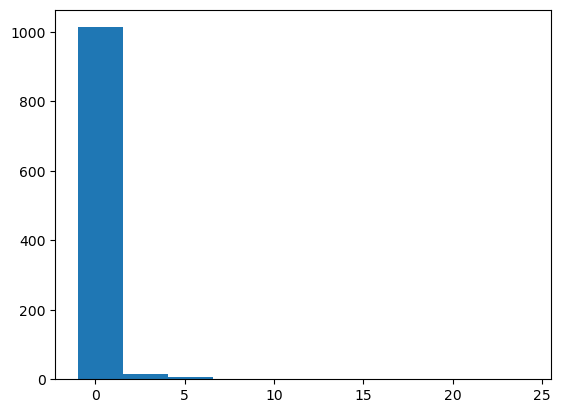

In [203]:
plt.hist(sym_reg_err)

Sum = 0
i = 0
bad_indices = []
for num in sym_reg_err:
    if np.isfinite(num):
        Sum += num**2
    else:
        bad_indices.append(i)
    i += 1
Sum = Sum/len(sym_reg_err)
rms = np.sqrt(Sum)
print(f"RMS error is {round(100*rms, 1)}%")
print(f"Median absolue value error is {round(100*np.median(abs(sym_reg_err[np.isfinite(sym_reg_err)])), 1)}%")

In [142]:
import corner

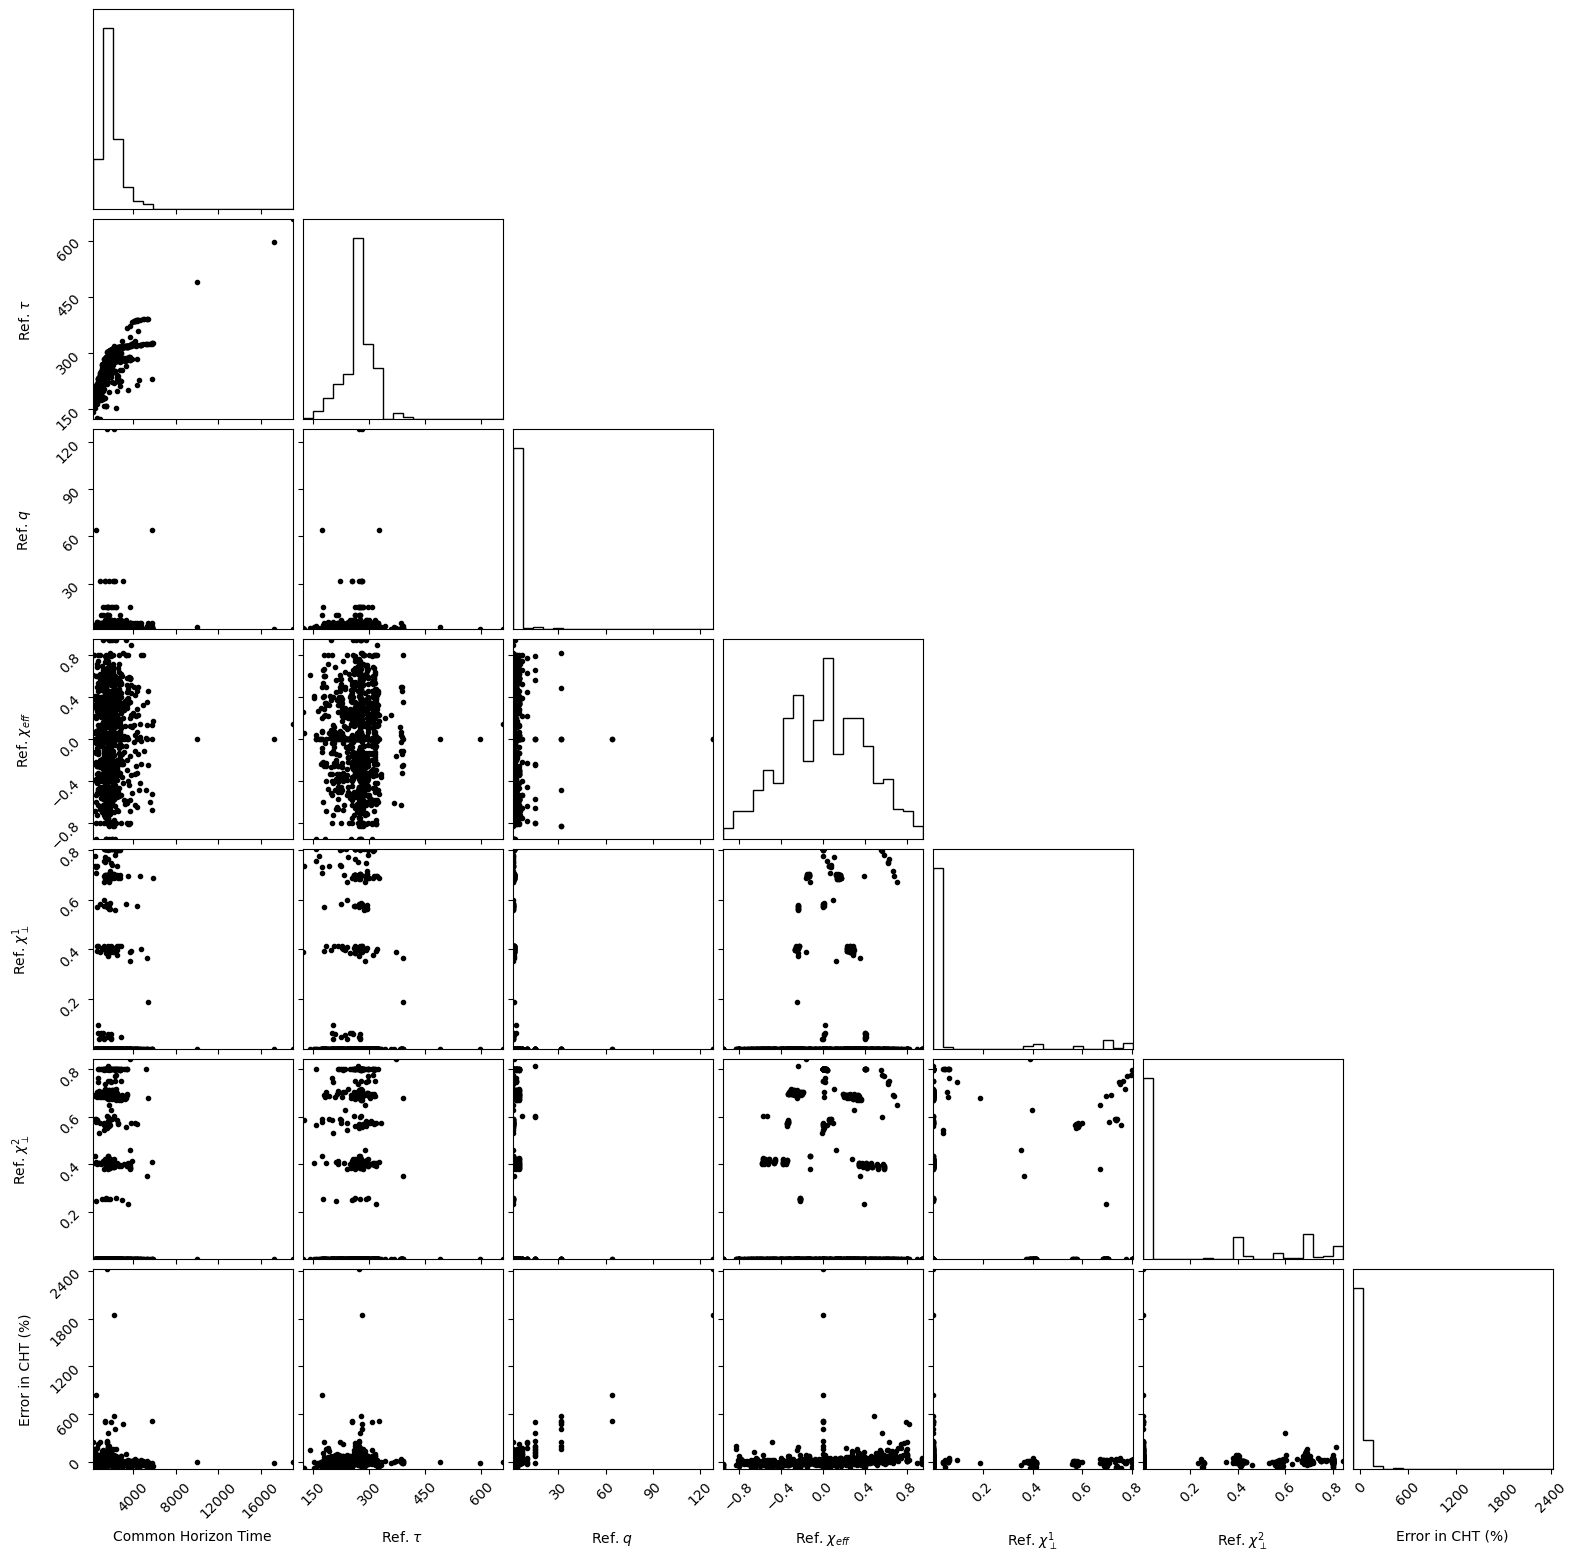

In [160]:
corrected_CHT = np.delete(CHT_rit, bad_indices)
corrected_tau = np.delete(tau_rit, bad_indices)
corrected_q = np.delete(q_rit, bad_indices)
corrected_chi_eff = np.delete(chi_eff_rit, bad_indices)
corrected_chi1_perp = np.delete(chi1_perp_rit, bad_indices)
corrected_chi2_perp = np.delete(chi2_perp_rit, bad_indices)
corrected_sym_reg_err = np.delete(sym_reg_err, bad_indices)

corner_array = np.column_stack([corrected_CHT, corrected_tau, corrected_q, corrected_chi_eff, corrected_chi1_perp, corrected_chi2_perp, 100*corrected_sym_reg_err])
#Here, we've stacked the columns because we want to plot points with data from the same event, but before we just had each value for all the events stored separately

corner_plot = corner.corner(
    corner_array,
    labels=[
        r"Common Horizon Time",
        r"Ref. $\tau$",
        r"Ref. $q$",
        r"Ref. $\chi_{eff}$",
        r"Ref. $\chi^1_{\perp}$",
        r"Ref. $\chi^2_{\perp}$",
        r"Error in CHT (%)"],
    plot_contours = False, 
    plot_datapoints = True,
    plot_density = False,
    marker = ".",
    color = "black"
)
corner.overplot_points(corner_plot, corner_array, color = "black")

#plt.savefig("Chi_Precessing_Corner.png")

In [ ]:
def weighted_E(outputs, labels):
   return (outputs - labels)/labels #For every simulation in a batch, I take the difference between the CHT proportion
    #associated with that simulation and the CHT proportion predicted by my model weighted by the simulation proportion. This should give the proportion
    #residual of my model's CHT predictions, then I sum up over the batch and divide by the size of the batch
    
criterion = weighted_E

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self, activation_function):
        super().__init__()
        self.fc1 = nn.Linear(5, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 1)
        self.activation_function = activation_function
    
    def forward(self, x):
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net(nn.ReLU())
model_path = 'nnet_33177.pth'

net.load_state_dict(torch.load(model_path, weights_only=False))
net.eval()

class CustomDataset():
    def __init__(self, labels, data):
        self.labels = labels
        self.data = data

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sim = self.data[idx]
        label = self.labels[idx]
        return sim, label

In [ ]:
CHT_rit_norm = CHT_rit/np.max(CHT_rit)
period_norm = tau_rit/np.max(tau_rit)
q_norm = q_rit/np.max(q_rit)

#Note that I have switched hte placement of chi1_perp and chi2_perp because mass ratio is defined oppositely by RIT from SXS
simulations_rit = np.column_stack((period_norm, q_norm, chi_eff_rit, chi2_perp_rit, chi1_perp_rit))

CHT_rit_norm = torch.tensor(CHT_rit_norm, dtype=torch.float)
simulations_rit = torch.tensor(simulations_rit, dtype=torch.float)

rit_sims = CustomDataset(CHT_rit_norm, simulations_rit)

from torch.utils.data import DataLoader

batch_num = 1
eval_dataloader = DataLoader(rit_sims, batch_size=batch_num, shuffle=False)

rit_losses = np.zeros(num_sims)

with torch.no_grad():
    for j, data in enumerate(eval_dataloader):
        inputs, labels = data

        inputs = inputs.float()
        
        outputs = net(inputs)

        outputs = outputs.squeeze()

        outputs = outputs.float()

        labels = labels.float()

        loss = criterion(outputs, labels)
        rit_losses[j] = 100 * loss.item()

In [ ]:
print(np.median(abs(rit_losses)))
print(np.mean(abs(rit_losses)))